In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px

mpl.rcParams['figure.figsize'] = (20, 20)
mpl.rcParams['axes.grid'] = False

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/energy_usage.csv', parse_dates=['date'], infer_datetime_format=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      1372 non-null   datetime64[ns]
 1   energy    1372 non-null   float64       
 2   temp      1372 non-null   float64       
 3   humidity  1372 non-null   float64       
 4   day       1372 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 53.7+ KB


In [4]:
df

,date,energy,temp,humidity,day
0,2016-01-11 17:00:00,55.000000,6.308333,92.000000,Monday
1,2016-01-11 18:00:00,176.666667,5.941667,91.583333,Monday
2,2016-01-12 09:00:00,43.333333,5.008333,91.000000,Tuesday
3,2016-01-12 10:00:00,230.000000,5.758333,88.916667,Tuesday
4,2016-01-12 11:00:00,55.000000,6.650000,83.916667,Tuesday
...,...,...,...,...,...
1367,2016-05-27 14:00:00,101.666667,21.916667,59.000000,Friday
1368,2016-05-27 15:00:00,76.666667,22.216667,57.333333,Friday
1369,2016-05-27 16:00:00,135.000000,22.883333,55.000000,Friday
1370,2016-05-27 17:00:00,180.000000,22.666667,55.833333,Friday


In [5]:
df.head(15)

,date,energy,temp,humidity,day
0,2016-01-11 17:00:00,55.000000,6.308333,92.000000,Monday
1,2016-01-11 18:00:00,176.666667,5.941667,91.583333,Monday
2,2016-01-12 09:00:00,43.333333,5.008333,91.000000,Tuesday
3,2016-01-12 10:00:00,230.000000,5.758333,88.916667,Tuesday
4,2016-01-12 11:00:00,55.000000,6.650000,83.916667,Tuesday
5,2016-01-12 12:00:00,186.666667,7.208333,80.166667,Tuesday
6,2016-01-12 13:00:00,151.666667,7.291667,79.833333,Tuesday
7,2016-01-12 14:00:00,136.666667,6.958333,78.916667,Tuesday
8,2016-01-12 15:00:00,36.666667,6.650000,78.500000,Tuesday
9,2016-01-12 16:00:00,40.000000,6.383333,79.083333,Tuesday


In [6]:
fig = px.line(df, x='date', y='energy', hover_data=['day','temp'], title='Energy Use')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1d", step="day", stepmode="backward"),
            dict(count=14, label="14d", step="day", stepmode="backward"),
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [7]:
power_df=df.set_index('date')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f389d743438>,
      dtype=object)

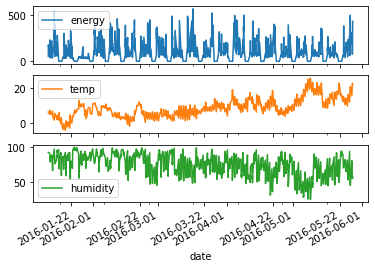

In [8]:
power_df.plot(subplots=True)

In [9]:
power_df

,energy,temp,humidity,day
date,,,,
2016-01-11 17:00:00,55.000000,6.308333,92.000000,Monday
2016-01-11 18:00:00,176.666667,5.941667,91.583333,Monday
2016-01-12 09:00:00,43.333333,5.008333,91.000000,Tuesday
2016-01-12 10:00:00,230.000000,5.758333,88.916667,Tuesday
2016-01-12 11:00:00,55.000000,6.650000,83.916667,Tuesday
...,...,...,...,...
2016-05-27 14:00:00,101.666667,21.916667,59.000000,Friday
2016-05-27 15:00:00,76.666667,22.216667,57.333333,Friday
2016-05-27 16:00:00,135.000000,22.883333,55.000000,Friday


In [10]:
filter1=df['day'] == 'Saturday'
filter2=df['day'] == 'Sunday'
df['weekday']=np.where(filter1 | filter2, 0, 1)

In [11]:
df

,date,energy,temp,humidity,day,weekday
0,2016-01-11 17:00:00,55.000000,6.308333,92.000000,Monday,1
1,2016-01-11 18:00:00,176.666667,5.941667,91.583333,Monday,1
2,2016-01-12 09:00:00,43.333333,5.008333,91.000000,Tuesday,1
3,2016-01-12 10:00:00,230.000000,5.758333,88.916667,Tuesday,1
4,2016-01-12 11:00:00,55.000000,6.650000,83.916667,Tuesday,1
...,...,...,...,...,...,...
1367,2016-05-27 14:00:00,101.666667,21.916667,59.000000,Friday,1
1368,2016-05-27 15:00:00,76.666667,22.216667,57.333333,Friday,1
1369,2016-05-27 16:00:00,135.000000,22.883333,55.000000,Friday,1
1370,2016-05-27 17:00:00,180.000000,22.666667,55.833333,Friday,1


In [12]:
df.query("day=='Saturday' or day=='Sunday'")

,date,energy,temp,humidity,day,weekday
42,2016-01-16 09:00:00,0.0,1.591667,96.166667,Saturday,0
43,2016-01-16 10:00:00,0.0,2.625000,94.166667,Saturday,0
44,2016-01-16 11:00:00,0.0,4.000000,90.500000,Saturday,0
45,2016-01-16 12:00:00,0.0,5.200000,78.250000,Saturday,0
46,2016-01-16 13:00:00,0.0,5.858333,71.833333,Saturday,0
...,...,...,...,...,...,...
1317,2016-05-22 14:00:00,0.0,16.550000,87.333333,Sunday,0
1318,2016-05-22 15:00:00,0.0,16.608333,87.083333,Sunday,0
1319,2016-05-22 16:00:00,0.0,16.325000,90.000000,Sunday,0
1320,2016-05-22 17:00:00,0.0,16.208333,91.666667,Sunday,0


In [13]:
df['time_bin'] = pd.cut(df['date'].dt.hour,bins=3, labels=False)
df['time_bin']

0       2
1       2
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    2
1370    2
1371    2
Name: time_bin, Length: 1372, dtype: int64

In [14]:
time_oh=pd.get_dummies(df['time_bin'], prefix='tbin')
time_oh

,tbin_0,tbin_1,tbin_2
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
1367,0,1,0
1368,0,1,0
1369,0,0,1
1370,0,0,1


In [15]:
df=df.join(time_oh)

In [16]:
df

,date,energy,temp,humidity,day,weekday,time_bin,tbin_0,tbin_1,tbin_2
0,2016-01-11 17:00:00,55.000000,6.308333,92.000000,Monday,1,2,0,0,1
1,2016-01-11 18:00:00,176.666667,5.941667,91.583333,Monday,1,2,0,0,1
2,2016-01-12 09:00:00,43.333333,5.008333,91.000000,Tuesday,1,0,1,0,0
3,2016-01-12 10:00:00,230.000000,5.758333,88.916667,Tuesday,1,0,1,0,0
4,2016-01-12 11:00:00,55.000000,6.650000,83.916667,Tuesday,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1367,2016-05-27 14:00:00,101.666667,21.916667,59.000000,Friday,1,1,0,1,0
1368,2016-05-27 15:00:00,76.666667,22.216667,57.333333,Friday,1,1,0,1,0
1369,2016-05-27 16:00:00,135.000000,22.883333,55.000000,Friday,1,2,0,0,1
1370,2016-05-27 17:00:00,180.000000,22.666667,55.833333,Friday,1,2,0,0,1


In [17]:
df_final=df[['date','energy','temp','humidity','weekday','tbin_0','tbin_1','tbin_2']].rename({'date':'ds','energy':'y'}, axis='columns')

In [18]:
df_final

,ds,y,temp,humidity,weekday,tbin_0,tbin_1,tbin_2
0,2016-01-11 17:00:00,55.000000,6.308333,92.000000,1,0,0,1
1,2016-01-11 18:00:00,176.666667,5.941667,91.583333,1,0,0,1
2,2016-01-12 09:00:00,43.333333,5.008333,91.000000,1,1,0,0
3,2016-01-12 10:00:00,230.000000,5.758333,88.916667,1,1,0,0
4,2016-01-12 11:00:00,55.000000,6.650000,83.916667,1,1,0,0
...,...,...,...,...,...,...,...,...
1367,2016-05-27 14:00:00,101.666667,21.916667,59.000000,1,0,1,0
1368,2016-05-27 15:00:00,76.666667,22.216667,57.333333,1,0,1,0
1369,2016-05-27 16:00:00,135.000000,22.883333,55.000000,1,0,0,1
1370,2016-05-27 17:00:00,180.000000,22.666667,55.833333,1,0,0,1


In [19]:
train=df_final[(df_final['ds'] >= '2016-01-11') & (df_final['ds'] <= '2016-05-15')]
test=df_final[(df_final['ds'] > '2016-05-15')]

In [20]:
train.shape

(1242, 8)

In [21]:
test.shape

(130, 8)

In [22]:
test

,ds,y,temp,humidity,weekday,tbin_0,tbin_1,tbin_2
1242,2016-05-15 09:00:00,0.000000,8.575000,67.166667,0,1,0,0
1243,2016-05-15 10:00:00,0.000000,9.475000,63.916667,0,1,0,0
1244,2016-05-15 11:00:00,0.000000,10.250000,59.750000,0,1,0,0
1245,2016-05-15 12:00:00,0.000000,10.891667,56.750000,0,1,0,0
1246,2016-05-15 13:00:00,0.000000,11.841667,52.500000,0,0,1,0
...,...,...,...,...,...,...,...,...
1367,2016-05-27 14:00:00,101.666667,21.916667,59.000000,1,0,1,0
1368,2016-05-27 15:00:00,76.666667,22.216667,57.333333,1,0,1,0
1369,2016-05-27 16:00:00,135.000000,22.883333,55.000000,1,0,0,1
1370,2016-05-27 17:00:00,180.000000,22.666667,55.833333,1,0,0,1


In [23]:
from fbprophet import Prophet
m = Prophet()

In [24]:
m.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [25]:
future = m.make_future_dataframe(periods=130, freq='H')
future.tail(50)

,ds
1322,2016-05-18 03:00:00
1323,2016-05-18 04:00:00
1324,2016-05-18 05:00:00
1325,2016-05-18 06:00:00
1326,2016-05-18 07:00:00
1327,2016-05-18 08:00:00
1328,2016-05-18 09:00:00
1329,2016-05-18 10:00:00
1330,2016-05-18 11:00:00
1331,2016-05-18 12:00:00


In [26]:
future = m.make_future_dataframe(periods=312, freq='H')
future

,ds
0,2016-01-11 17:00:00
1,2016-01-11 18:00:00
2,2016-01-12 09:00:00
3,2016-01-12 10:00:00
4,2016-01-12 11:00:00
...,...
1549,2016-05-27 14:00:00
1550,2016-05-27 15:00:00
1551,2016-05-27 16:00:00
1552,2016-05-27 17:00:00


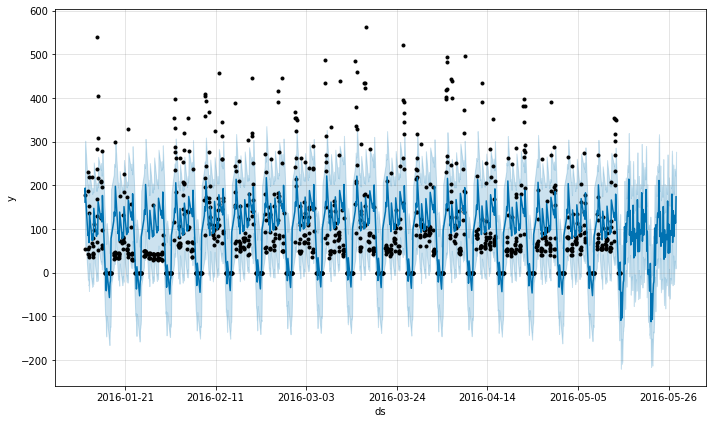

In [27]:
fcst = m.predict(future)
fig = m.plot(fcst)

In [28]:
fcst[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(20)

,ds,yhat,yhat_lower,yhat_upper
1534,2016-05-26 23:00:00,68.842427,-29.040286,178.347000
1535,2016-05-27 00:00:00,84.642408,-18.192907,190.291430
1536,2016-05-27 01:00:00,117.869630,12.397760,226.535568
1537,2016-05-27 02:00:00,141.712202,39.305314,247.601450
1538,2016-05-27 03:00:00,139.643126,33.185376,245.581937
1539,2016-05-27 04:00:00,116.624552,12.833742,225.416443
1540,2016-05-27 05:00:00,92.091693,-18.894334,199.203219
1541,2016-05-27 06:00:00,82.776661,-25.975730,180.439037
1542,2016-05-27 07:00:00,91.012269,-19.695735,195.823522
1543,2016-05-27 08:00:00,107.076293,1.309135,216.323643


In [29]:
future_final = future.copy()
future_final = future_final[future_final['ds'].dt.hour > 8][future_final['ds'].dt.hour < 19]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [30]:
future_final.tail(50)

,ds
1448,2016-05-23 09:00:00
1449,2016-05-23 10:00:00
1450,2016-05-23 11:00:00
1451,2016-05-23 12:00:00
1452,2016-05-23 13:00:00
1453,2016-05-23 14:00:00
1454,2016-05-23 15:00:00
1455,2016-05-23 16:00:00
1456,2016-05-23 17:00:00
1457,2016-05-23 18:00:00


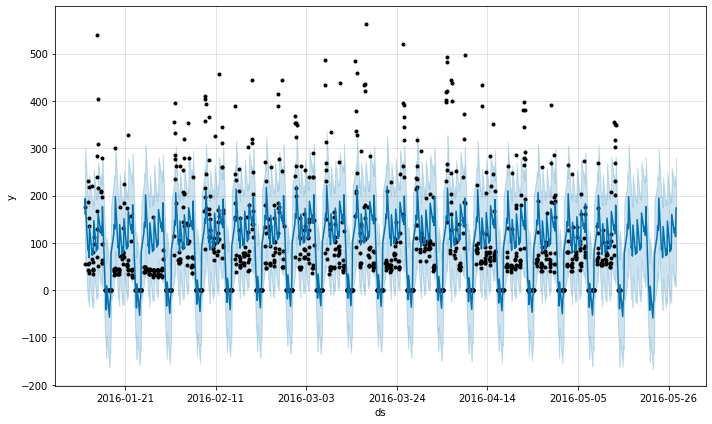

In [31]:
fcst = m.predict(future_final)
fig = m.plot(fcst)

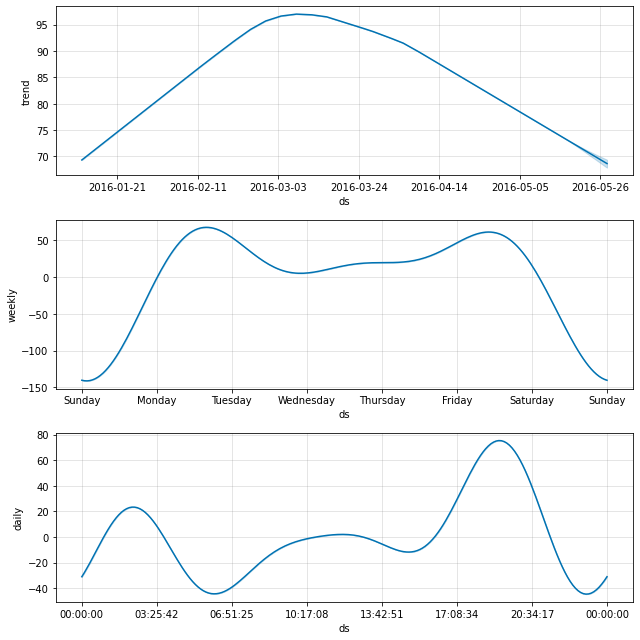

In [32]:
fig2 = m.plot_components(fcst)

In [33]:
fcst[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(20)

,ds,yhat,yhat_lower,yhat_upper
1352,2016-05-26 09:00:00,81.359654,-27.999993,185.762250
1353,2016-05-26 10:00:00,88.986999,-18.503448,187.379629
1354,2016-05-26 11:00:00,93.219755,-8.713316,206.373354
1355,2016-05-26 12:00:00,95.421074,-15.505952,199.791496
1356,2016-05-26 13:00:00,93.805897,-0.627139,197.964445
1357,2016-05-26 14:00:00,88.267350,-24.432942,197.525181
1358,2016-05-26 15:00:00,85.591462,-22.915809,186.554521
1359,2016-05-26 16:00:00,96.577394,-5.458352,208.299119
1360,2016-05-26 17:00:00,125.226041,20.460064,224.226107
1361,2016-05-26 18:00:00,160.307060,52.955473,258.137603


In [34]:
fcst['day'] = fcst['ds'].dt.day_name()
fcst['day']

0        Monday
1        Monday
2       Tuesday
3       Tuesday
4       Tuesday
         ...   
1367     Friday
1368     Friday
1369     Friday
1370     Friday
1371     Friday
Name: day, Length: 1372, dtype: object

In [35]:
fcst[['ds','day', 'yhat', 'yhat_lower', 'yhat_upper']].query("day == 'Saturday'")

,ds,day,yhat,yhat_lower,yhat_upper
42,2016-01-16 09:00:00,Saturday,7.397032,-100.908758,117.507669
43,2016-01-16 10:00:00,Saturday,6.024094,-101.648992,112.726460
44,2016-01-16 11:00:00,Saturday,1.235380,-105.330057,111.991055
45,2016-01-16 12:00:00,Saturday,-5.549542,-109.561039,101.444443
46,2016-01-16 13:00:00,Saturday,-16.056961,-119.466288,92.844074
...,...,...,...,...,...
1307,2016-05-21 14:00:00,Saturday,-31.146074,-128.392444,75.841185
1308,2016-05-21 15:00:00,Saturday,-42.384407,-148.161363,56.757263
1309,2016-05-21 16:00:00,Saturday,-39.680837,-151.811443,58.367520
1310,2016-05-21 17:00:00,Saturday,-18.970789,-133.396920,87.474598


In [36]:
m = Prophet(seasonality_mode='multiplicative', daily_seasonality=True, interval_width=0.95)
m.add_regressor('weekday',standardize=False)
m.add_regressor('temp',standardize=False )
m.add_regressor('tbin_0',standardize=False)
m.add_regressor('tbin_1',standardize=False)
m.add_regressor('tbin_2',standardize=False)

In [37]:
m.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [38]:
future_final=future_final.reset_index()
future_final

,index,ds
0,0,2016-01-11 17:00:00
1,1,2016-01-11 18:00:00
2,2,2016-01-12 09:00:00
3,3,2016-01-12 10:00:00
4,4,2016-01-12 11:00:00
...,...,...
1367,1549,2016-05-27 14:00:00
1368,1550,2016-05-27 15:00:00
1369,1551,2016-05-27 16:00:00
1370,1552,2016-05-27 17:00:00


In [39]:
future_final['weekday'] = df_final['weekday']
future_final['temp'] = df_final['temp']
future_final['tbin_0'] = df_final['tbin_0']
future_final['tbin_1'] = df_final['tbin_1']
future_final['tbin_2'] = df_final['tbin_2']

In [40]:
future_final

,index,ds,weekday,temp,tbin_0,tbin_1,tbin_2
0,0,2016-01-11 17:00:00,1,6.308333,0,0,1
1,1,2016-01-11 18:00:00,1,5.941667,0,0,1
2,2,2016-01-12 09:00:00,1,5.008333,1,0,0
3,3,2016-01-12 10:00:00,1,5.758333,1,0,0
4,4,2016-01-12 11:00:00,1,6.650000,1,0,0
...,...,...,...,...,...,...,...
1367,1549,2016-05-27 14:00:00,1,21.916667,0,1,0
1368,1550,2016-05-27 15:00:00,1,22.216667,0,1,0
1369,1551,2016-05-27 16:00:00,1,22.883333,0,0,1
1370,1552,2016-05-27 17:00:00,1,22.666667,0,0,1


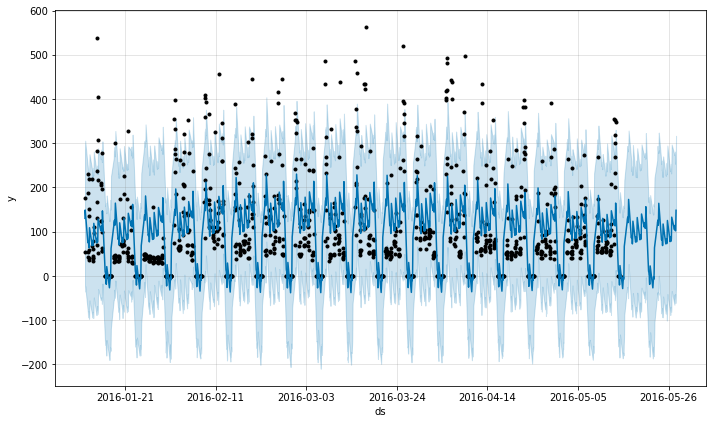

In [41]:
fcst = m.predict(future_final)
fig  = m.plot(fcst)

In [42]:
fcst['day'] = fcst['ds'].dt.day_name()
fcst[['ds','day', 'yhat', 'yhat_lower', 'yhat_upper']].query("day == 'Saturday'")

,ds,day,yhat,yhat_lower,yhat_upper
42,2016-01-16 09:00:00,Saturday,10.439543,-155.255663,158.396909
43,2016-01-16 10:00:00,Saturday,8.263593,-146.016632,162.600818
44,2016-01-16 11:00:00,Saturday,7.617236,-144.892853,164.870687
45,2016-01-16 12:00:00,Saturday,2.249481,-150.591437,155.864536
46,2016-01-16 13:00:00,Saturday,1.065888,-165.016645,151.173361
...,...,...,...,...,...
1307,2016-05-21 14:00:00,Saturday,-13.387063,-166.247053,146.277328
1308,2016-05-21 15:00:00,Saturday,-19.001277,-182.053817,142.033565
1309,2016-05-21 16:00:00,Saturday,-17.672665,-182.405239,148.966920
1310,2016-05-21 17:00:00,Saturday,4.068098,-152.095848,160.803597
